In [2]:
import os
import datetime
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path='/content/drive/MyDrive/Base análisis de clientes (1).xlsx'
df = pd.read_excel(path)
df

marca_caida  SEGMENTO  ... MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
0                0     84000  ...           7631.70         -3.481613e+08
1                0     84000  ...           3373.76         -5.672990e+03
2                0     84000  ...              0.00          3.161589e+06
3                0     84000  ...          11376.82         -2.177451e+08
4                0     84000  ...              0.00          1.280716e+06
...            ...       ...  ...               ...                   ...
12295            1     84000  ...          62000.84          1.052557e+09
12296            1     84000  ...          10603.74          8.400775e+08
12297            1     84000  ...           2742.26         -3.920457e+08
12298            1     85100  ...               NaN                   NaN
12299            1     85100  ...             32.72          5.327200e+02

[12300 rows x 21 columns]

# Acondicionamiento de datos

#Ver tipos de dato

In [5]:
df.dtypes

marca_caida                             int64
SEGMENTO                                int64
SEXO                                   object
ACTIVO                                float64
PASIVO                                float64
VOLUMEN DE NEGOCIO                      int64
RANGO_VOL                              object
EDAD                                  float64
RANGO_EDAD                             object
CROSS_SELL O CANTIDAD DE PRODUCTOS    float64
INGRESO_FINAL                         float64
BURO_DIC_20                             int64
BURO_ENE_21                           float64
BURO_FEB_21                             int64
MARCA TENENCIA                         object
COLECTIVO_PRIMARIO                     object
ACTIVO_NET                             object
ACTIVO_MOVIL                           object
MAR_INVERSIÓN_ACUM                    float64
MAR_RECURSOS_ACUM                     float64
RENTABILIDAD CLIENTE                  float64
dtype: object

## Variables categóricas de activos netos y móviles

In [6]:
df['ACTIVO_NET'] =  pd.factorize(df['ACTIVO_NET'])[0] + 1 

df['ACTIVO_MOVIL'] =  pd.factorize(df['ACTIVO_MOVIL'])[0] +1

df

marca_caida  SEGMENTO  ... MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
0                0     84000  ...           7631.70         -3.481613e+08
1                0     84000  ...           3373.76         -5.672990e+03
2                0     84000  ...              0.00          3.161589e+06
3                0     84000  ...          11376.82         -2.177451e+08
4                0     84000  ...              0.00          1.280716e+06
...            ...       ...  ...               ...                   ...
12295            1     84000  ...          62000.84          1.052557e+09
12296            1     84000  ...          10603.74          8.400775e+08
12297            1     84000  ...           2742.26         -3.920457e+08
12298            1     85100  ...               NaN                   NaN
12299            1     85100  ...             32.72          5.327200e+02

[12300 rows x 21 columns]

#Verificación de outliers

In [7]:
df.describe()

marca_caida      SEGMENTO  ...  MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
count  12300.000000  12300.000000  ...       1.111000e+04          1.111000e+04
mean       0.017398  85129.439024  ...       1.442069e+05          1.107899e+09
std        0.130756   1598.354969  ...       7.648123e+05          6.783939e+09
min        0.000000  80100.000000  ...      -2.243340e+06         -1.603381e+09
25%        0.000000  84000.000000  ...       8.424250e+01          5.468000e+01
50%        0.000000  85100.000000  ...       1.414745e+03          1.360340e+03
75%        0.000000  87000.000000  ...       3.994491e+04          8.793589e+05
max        1.000000  87000.000000  ...       3.470028e+07          9.963246e+10

[8 rows x 16 columns]

Hay outliers en la variable edad. Se procede a eliminarlos

In [8]:
df[df['EDAD']>100]

marca_caida  SEGMENTO  ... MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
4745             0     87000  ...              0.33                  0.33
5182             0     87000  ...            108.60                108.60
5909             0     87000  ...           1578.60               1578.60
6528             0     84000  ...          28010.99              10258.49
6932             0     87000  ...           1781.50               1781.50
6976             0     87000  ...            240.39                240.39
10520            0     87000  ...              0.25                  0.25

[7 rows x 21 columns]

In [9]:
df=df[df['EDAD']<=121]

#Identificación de usuarios con baja en Buró >10% entre diciembre 2020 y febrero 2021

In [10]:
df['BAJO_BURO']= np.where(((df['BURO_DIC_20'] - df['BURO_FEB_21'])/df['BURO_DIC_20'] >= 0.1), "Baja", "Sin baja")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


marca_caida  SEGMENTO  ... RENTABILIDAD CLIENTE  BAJO_BURO
0                0     84000  ...        -3.481613e+08   Sin baja
1                0     84000  ...        -5.672990e+03   Sin baja
2                0     84000  ...         3.161589e+06   Sin baja
3                0     84000  ...        -2.177451e+08   Sin baja
4                0     84000  ...         1.280716e+06   Sin baja
...            ...       ...  ...                  ...        ...
12295            1     84000  ...         1.052557e+09       Baja
12296            1     84000  ...         8.400775e+08       Baja
12297            1     84000  ...        -3.920457e+08       Baja
12298            1     85100  ...                  NaN       Baja
12299            1     85100  ...         5.327200e+02       Baja

[11060 rows x 22 columns]

In [11]:
df[df['BAJO_BURO']=="Baja"].to_csv('clientes_bajo_buro.csv', index=True)
df[df['BAJO_BURO']=="Baja"]

marca_caida  SEGMENTO  ... RENTABILIDAD CLIENTE  BAJO_BURO
12086            1     87000  ...         2.625000e+01       Baja
12087            1     83000  ...         9.671172e+10       Baja
12088            1     84000  ...         7.188882e+05       Baja
12089            1     85100  ...                  NaN       Baja
12090            1     87000  ...         6.778100e+02       Baja
...            ...       ...  ...                  ...        ...
12295            1     84000  ...         1.052557e+09       Baja
12296            1     84000  ...         8.400775e+08       Baja
12297            1     84000  ...        -3.920457e+08       Baja
12298            1     85100  ...                  NaN       Baja
12299            1     85100  ...         5.327200e+02       Baja

[186 rows x 22 columns]

Acá se encuentran los 214 individuos buscados

#Caracterización de personas con baja en buró vs personas sin baja en buró

In [12]:
df[df['BAJO_BURO']=="Baja"].describe()

marca_caida      SEGMENTO  ...  MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
count        186.0    186.000000  ...       1.610000e+02          1.610000e+02
mean           1.0  85176.344086  ...       4.362775e+04          1.726611e+09
std            0.0   1445.769063  ...       1.446652e+05          9.568000e+09
min            1.0  82000.000000  ...       0.000000e+00         -3.920457e+08
25%            1.0  84000.000000  ...       6.676000e+01          2.580000e+01
50%            1.0  85100.000000  ...       1.102190e+03          1.102190e+03
75%            1.0  87000.000000  ...       1.178926e+04          1.047733e+06
max            1.0  87000.000000  ...       1.099256e+06          9.671172e+10

[8 rows x 16 columns]

In [13]:
df[df['BAJO_BURO']!="Baja"].describe()

marca_caida      SEGMENTO  ...  MAR_RECURSOS_ACUM  RENTABILIDAD CLIENTE
count      10874.0  10874.000000  ...       9.723000e+03          9.723000e+03
mean           0.0  84922.457237  ...       1.639743e+05          1.237365e+09
std            0.0   1556.404366  ...       8.154055e+05          7.134634e+09
min            0.0  80100.000000  ...      -2.243340e+06         -1.603381e+09
25%            0.0  84000.000000  ...       1.108450e+02          6.364500e+01
50%            0.0  84000.000000  ...       2.693980e+03          5.766490e+03
75%            0.0  87000.000000  ...       5.543462e+04          1.181697e+06
max            0.0  87000.000000  ...       3.470028e+07          9.963246e+10

[8 rows x 16 columns]

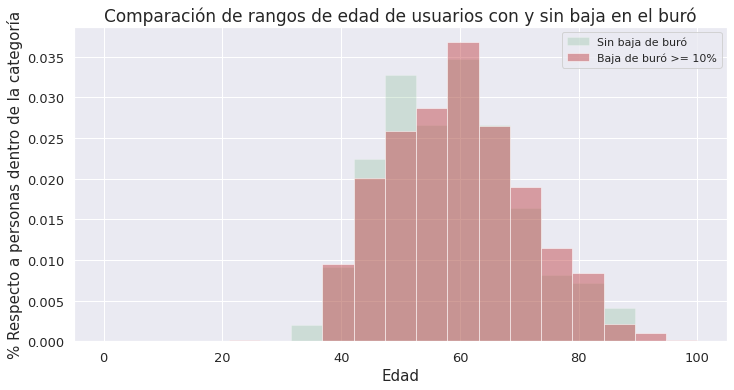

In [14]:
bins=np.linspace(0, 100, 20)

normal = df[df['BAJO_BURO']=="Baja"]['EDAD']
bajo_buro = df[df['BAJO_BURO']=="Sin baja"]['EDAD']

plt.figure(figsize=(10,5))

label=['Sin baja de buró', 'Baja de buró >= 10%']
plt.hist(normal, bins=bins, label='Sin baja de buró', density=True, alpha=0.2, color='g')
plt.hist(bajo_buro, bins=bins, label='Baja de buró >= 10%', density=True, alpha=0.5, color='r')
plt.tight_layout()
plt.legend(loc='upper right')
plt.title("Comparación de rangos de edad de usuarios con y sin baja en el buró", fontsize=17)
plt.xlabel("Edad", fontsize=15)
plt.ylabel("% Respecto a personas dentro de la categoría", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

Text(0.5, 1.0, 'Ingreso final de usuarios con y sin baja en el buró')

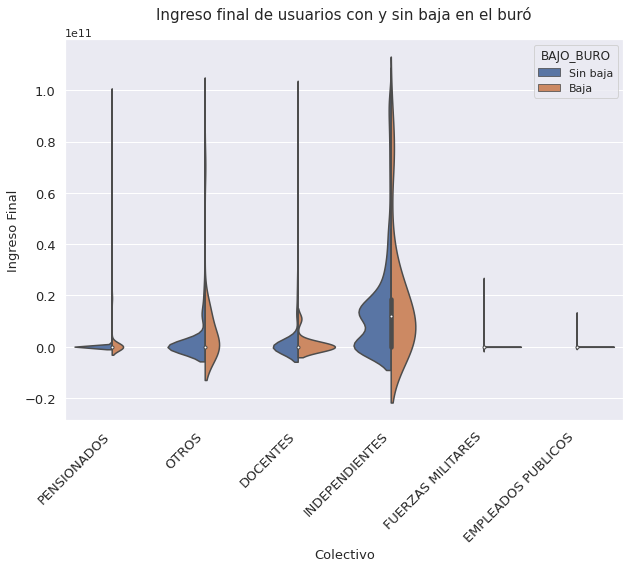

In [20]:
plt.figure(figsize=(10,7))

ax = sns.violinplot(data=df, y="INGRESO_FINAL", x="COLECTIVO_PRIMARIO", hue="BAJO_BURO", split=True)
plt.xlabel("Colectivo", fontsize=13)
plt.ylabel("Ingreso Final", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, ha='right')
ax.set_title("Ingreso final de usuarios con y sin baja en el buró", fontsize=15, pad=20)

Text(0.5, 1.0, 'Comparación de distribución de rentabilidad por colectivo')

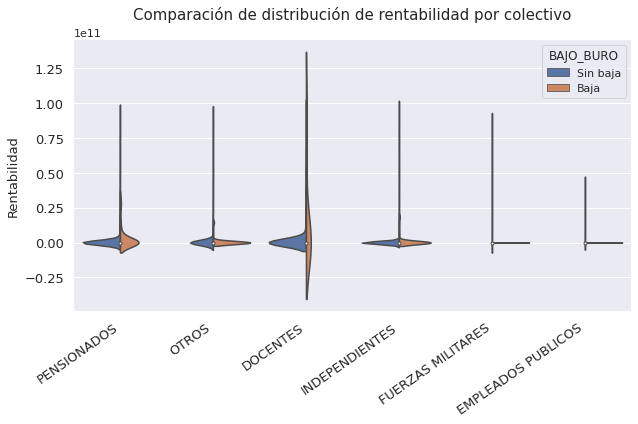

In [28]:
plt.figure(figsize=(10,5))

ax = sns.violinplot(data=df, y="RENTABILIDAD CLIENTE", x="COLECTIVO_PRIMARIO", hue="BAJO_BURO", split=True)
plt.xlabel("", fontsize=13)
plt.ylabel("Rentabilidad", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=35, ha='right')
ax.set_title("Comparación de distribución de rentabilidad por colectivo", fontsize=15, pad=20)

Text(0.5, 1.0, 'Comparación de distribución de rentabilidad de usuarios con y sin baja en el buró')

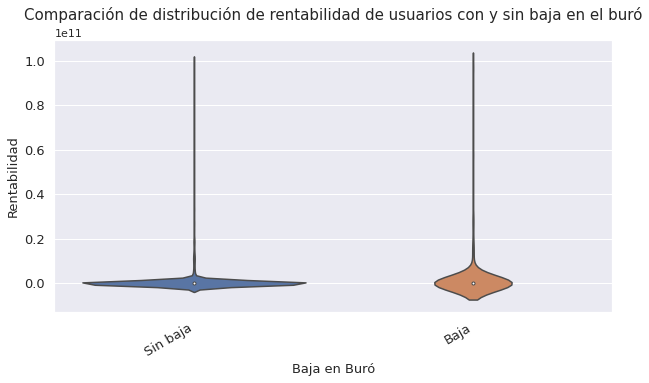

In [30]:
plt.figure(figsize=(10,5))

ax = sns.violinplot(data=df, y="RENTABILIDAD CLIENTE", x="BAJO_BURO", split=True)
plt.xlabel("Baja en Buró", fontsize=13)
plt.ylabel("Rentabilidad", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=30, ha='right')
ax.set_title("Comparación de distribución de rentabilidad de usuarios con y sin baja en el buró", fontsize=15, pad=20)

In [19]:
df[df["BAJO_BURO"]=="Baja"]["RENTABILIDAD CLIENTE"].dropna().values

array([-3.48161345e+08, -5.67299000e+03,  3.16158872e+06, ...,
        8.40077545e+08, -3.92045745e+08,  5.32720000e+02])

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

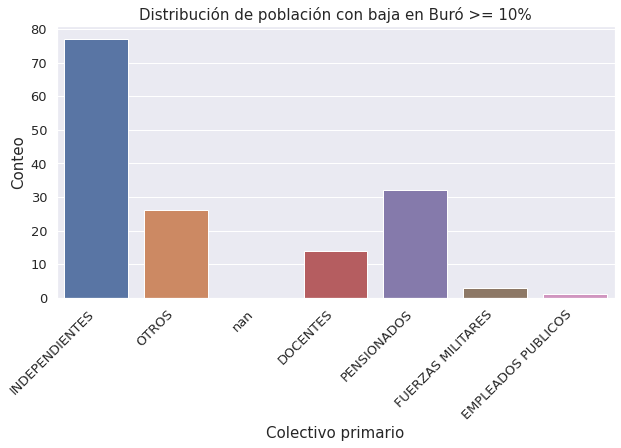

In [249]:
plt.figure(figsize=(10,5))

labels = df['COLECTIVO_PRIMARIO'].unique()

sns.countplot(data= df[df['BAJO_BURO']=="Baja"], 
              x="COLECTIVO_PRIMARIO",
              order=labels)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de población con baja en Buró >= 10%", fontsize=15)
plt.xlabel("Colectivo primario", fontsize=15)
plt.ylabel("Conteo", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [266]:
df['COLECTIVO_PRIMARIO'].dropna().unique()

array(['INDEPENDIENTES', 'OTROS', 'DOCENTES', 'PENSIONADOS',
       'FUERZAS MILITARES', 'EMPLEADOS PUBLICOS'], dtype=object)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

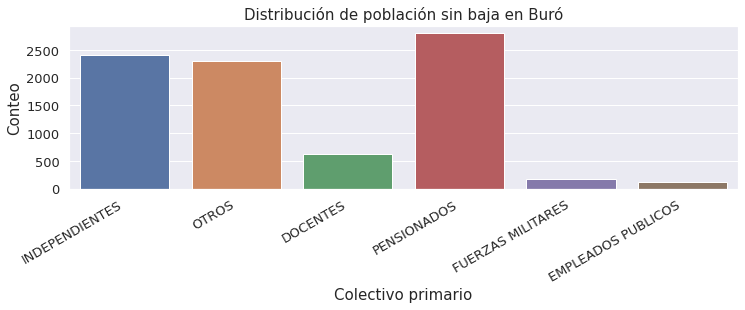

In [274]:

plt.figure(figsize=(12,3))

labels = df['COLECTIVO_PRIMARIO'].dropna().unique()

label=['Sin baja de buró', 'Baja de buró >= 10%']
sns.countplot(data= df[df['BAJO_BURO']=="Sin baja"], 
              x="COLECTIVO_PRIMARIO",
              order=labels)
plt.xticks(rotation=30, ha='right')
plt.title("Distribución de población sin baja en Buró", fontsize=15)
plt.xlabel("Colectivo primario", fontsize=15)
plt.ylabel("Conteo", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

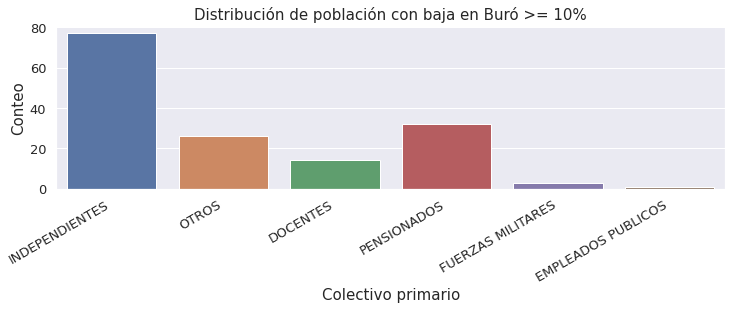

In [273]:

plt.figure(figsize=(12,3))

labels = df['COLECTIVO_PRIMARIO'].dropna().unique()

label=['Sin baja de buró', 'Baja de buró >= 10%']
sns.countplot(data= df[df['BAJO_BURO']=="Baja"], 
              x="COLECTIVO_PRIMARIO",
              order=labels)
plt.xticks(rotation=30, ha='right')
plt.title("Distribución de población con baja en Buró >= 10%", fontsize=15)
plt.xlabel("Colectivo primario", fontsize=15)
plt.ylabel("Conteo", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [285]:
df[df['BAJO_BURO']=="Sin baja"][df['COLECTIVO_PRIMARIO']=="EMPLEADOS PUBLICOS"].shape[0]/df[df['COLECTIVO_PRIMARIO']=="EMPLEADOS PUBLICOS"].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.9918032786885246

In [286]:
df[df['BAJO_BURO']=="Baja"][df['COLECTIVO_PRIMARIO']=="EMPLEADOS PUBLICOS"].shape[0]/df[df['COLECTIVO_PRIMARIO']=="EMPLEADOS PUBLICOS"].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.00819672131147541

In [296]:
for colectivo in df['COLECTIVO_PRIMARIO'].dropna().unique():
  print("Colectivo: " + colectivo)
  down = 100*df[df['BAJO_BURO']=="Baja"][df['COLECTIVO_PRIMARIO']==colectivo].shape[0]/df[df['BAJO_BURO']=="Baja"].shape[0]
  print("Baja: " + str(down) + "%")
  non_down = 100*df[df['BAJO_BURO']=="Sin baja"][df['COLECTIVO_PRIMARIO']==colectivo].shape[0]/df[df['BAJO_BURO']=="Sin baja"].shape[0]
  print("Sin Baja: " + str(non_down) + "%")
  print("************")

Colectivo: INDEPENDIENTES
Baja: 41.39784946236559%
Sin Baja: 22.107780025749495%
************
Colectivo: OTROS
Baja: 13.978494623655914%
Sin Baja: 21.18815523266507%
************
Colectivo: DOCENTES
Baja: 7.526881720430108%
Sin Baja: 5.784439948501012%
************
Colectivo: PENSIONADOS
Baja: 17.204301075268816%
Sin Baja: 25.758690454294648%
************
Colectivo: FUERZAS MILITARES
Baja: 1.6129032258064515%
Sin Baja: 1.5725583961743608%
************
Colectivo: EMPLEADOS PUBLICOS
Baja: 0.5376344086021505%
Sin Baja: 1.11274599963215%
************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

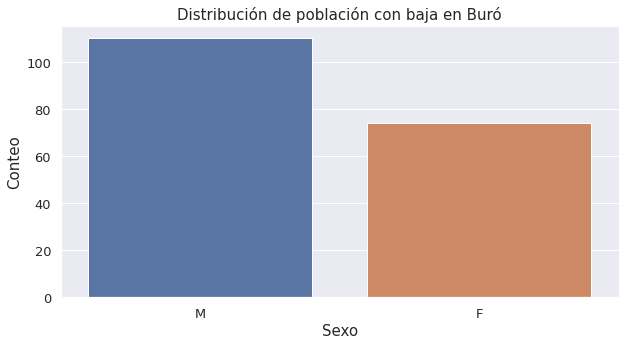

In [251]:
plt.figure(figsize=(10,5))

sns.countplot(data= df[df['BAJO_BURO']=="Baja"], 
              x="SEXO")
plt.title("Distribución de población con baja en Buró", fontsize=15)
plt.xlabel("Sexo", fontsize=15)
plt.ylabel("Conteo", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09,  1.4e+09]),
 <a list of 9 Text major ticklabel objects>)

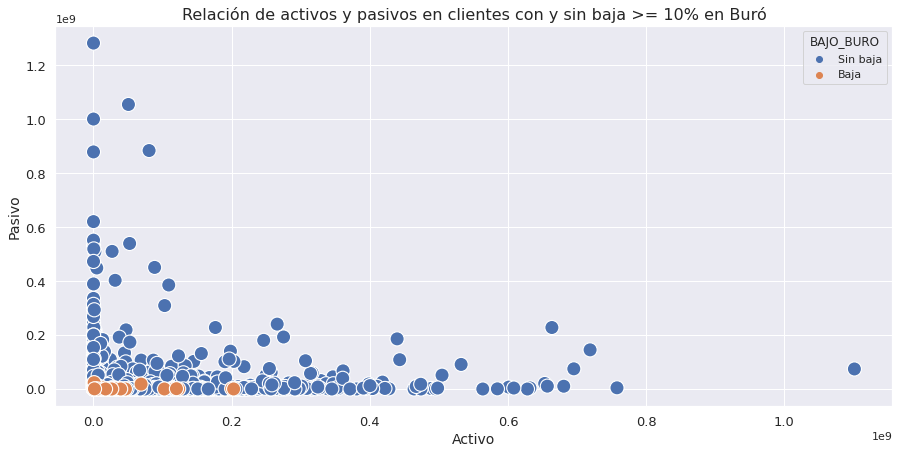

In [303]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="ACTIVO", y="PASIVO", hue="BAJO_BURO", s=200)
ax.set_title('Relación de activos y pasivos en clientes con y sin baja >= 10% en Buró', fontsize=16)
ax.set_xlabel('Activo', fontsize=14)
ax.set_ylabel('Pasivo', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+10,  0.0e+00,  2.0e+10,  4.0e+10,  6.0e+10,  8.0e+10,
         1.0e+11,  1.2e+11]), <a list of 8 Text major ticklabel objects>)

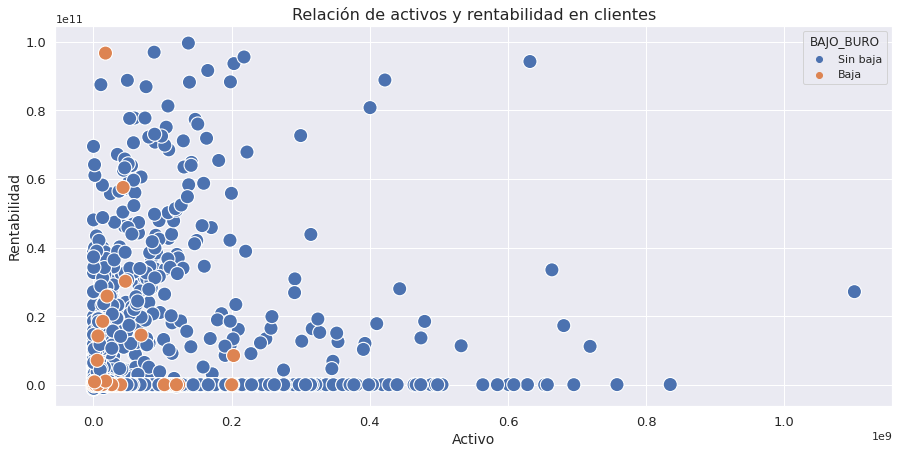

In [31]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="ACTIVO", y="RENTABILIDAD CLIENTE", hue="BAJO_BURO", s=200)
ax.set_title('Relación de activos y rentabilidad en clientes', fontsize=16)
ax.set_xlabel('Activo', fontsize=14)
ax.set_ylabel('Rentabilidad', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+10,  0.0e+00,  2.0e+10,  4.0e+10,  6.0e+10,  8.0e+10,
         1.0e+11,  1.2e+11]), <a list of 8 Text major ticklabel objects>)

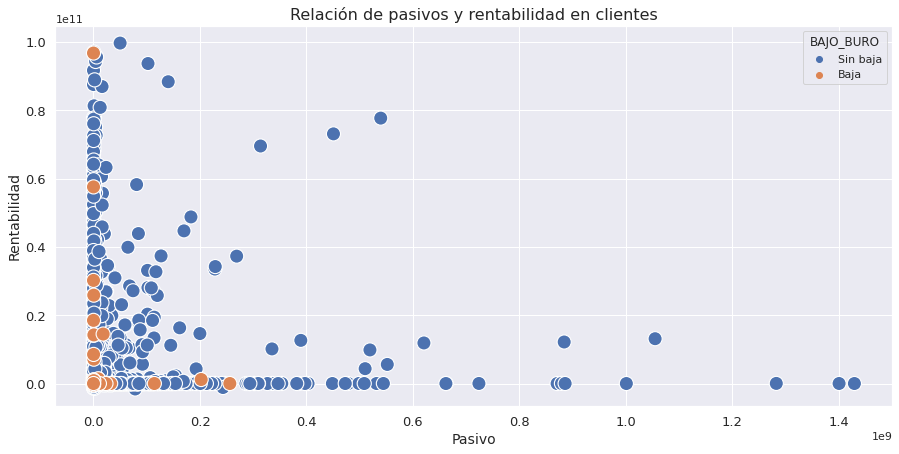

In [39]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="PASIVO", y="RENTABILIDAD CLIENTE", hue="BAJO_BURO", s=200)
ax.set_title('Relación de pasivos y rentabilidad en clientes', fontsize=16)
ax.set_xlabel('Pasivo', fontsize=14)
ax.set_ylabel('Rentabilidad', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+10,  0.0e+00,  2.0e+10,  4.0e+10,  6.0e+10,  8.0e+10,
         1.0e+11,  1.2e+11]), <a list of 8 Text major ticklabel objects>)

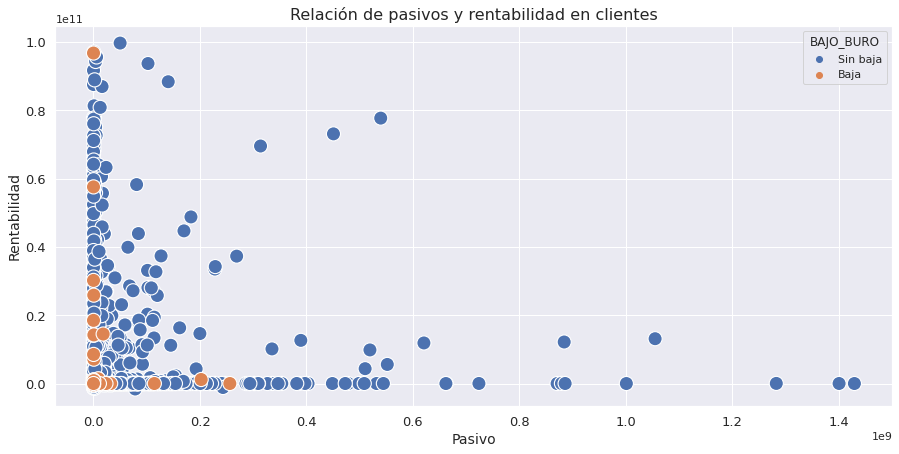

In [32]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="PASIVO", y="RENTABILIDAD CLIENTE", hue="BAJO_BURO", s=200)
ax.set_title('Relación de pasivos y rentabilidad en clientes', fontsize=16)
ax.set_xlabel('Pasivo', fontsize=14)
ax.set_ylabel('Rentabilidad', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09,  1.4e+09]),
 <a list of 9 Text major ticklabel objects>)

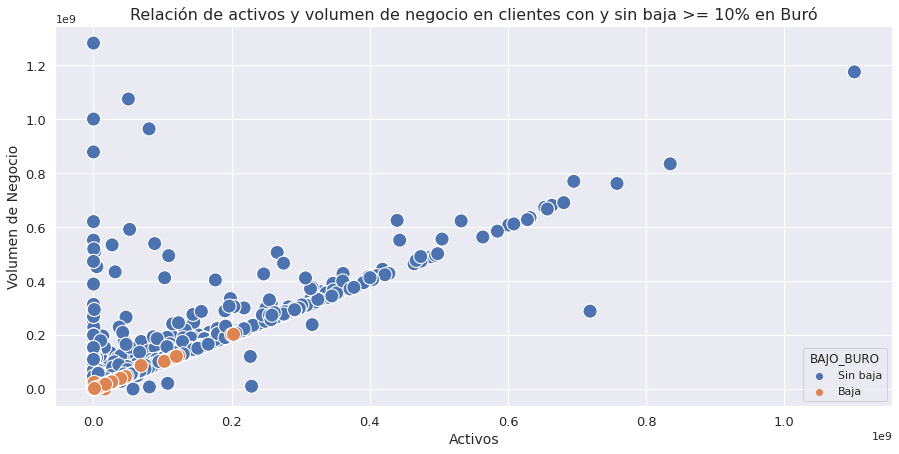

In [24]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="ACTIVO", y="VOLUMEN DE NEGOCIO", hue="BAJO_BURO", s=200)
ax.set_title('Relación de activos y volumen de negocio en clientes con y sin baja >= 10% en Buró', fontsize=16)
ax.set_xlabel('Activos', fontsize=14)
ax.set_ylabel('Volumen de Negocio', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+10,  0.0e+00,  2.0e+10,  4.0e+10,  6.0e+10,  8.0e+10,
         1.0e+11,  1.2e+11]), <a list of 8 Text major ticklabel objects>)

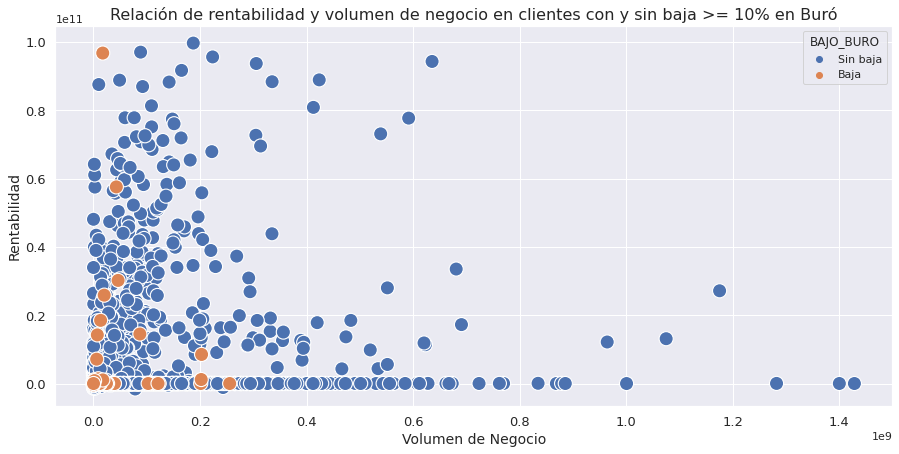

In [33]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, y="RENTABILIDAD CLIENTE", x="VOLUMEN DE NEGOCIO", hue="BAJO_BURO", s=200)
ax.set_title('Relación de rentabilidad y volumen de negocio en clientes con y sin baja >= 10% en Buró', fontsize=16)
ax.set_ylabel('Rentabilidad', fontsize=14)
ax.set_xlabel('Volumen de Negocio', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([-2.0e+10,  0.0e+00,  2.0e+10,  4.0e+10,  6.0e+10,  8.0e+10,
         1.0e+11,  1.2e+11]), <a list of 8 Text major ticklabel objects>)

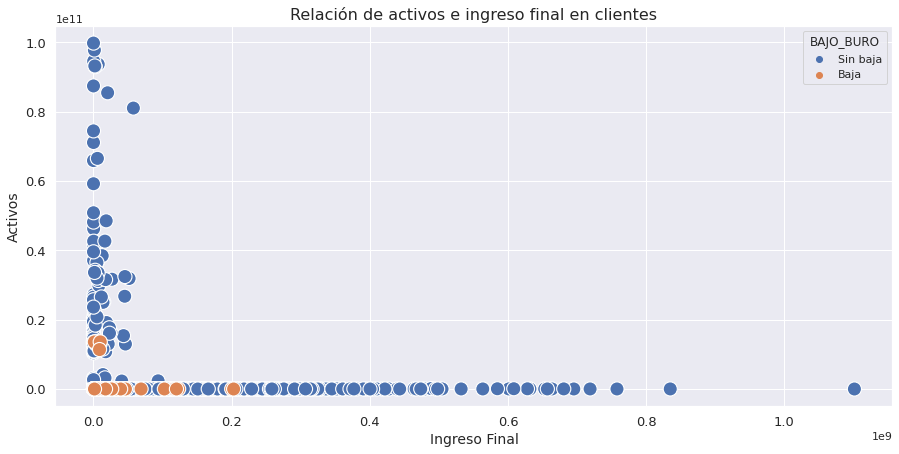

In [38]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df, x="ACTIVO", y="INGRESO_FINAL", hue="BAJO_BURO", s=200)
ax.set_title('Relación de activos e ingreso final en clientes', fontsize=16)
ax.set_ylabel('Activos', fontsize=14)
ax.set_xlabel('Ingreso Final', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Text(0, 0.5, 'Pasivo')

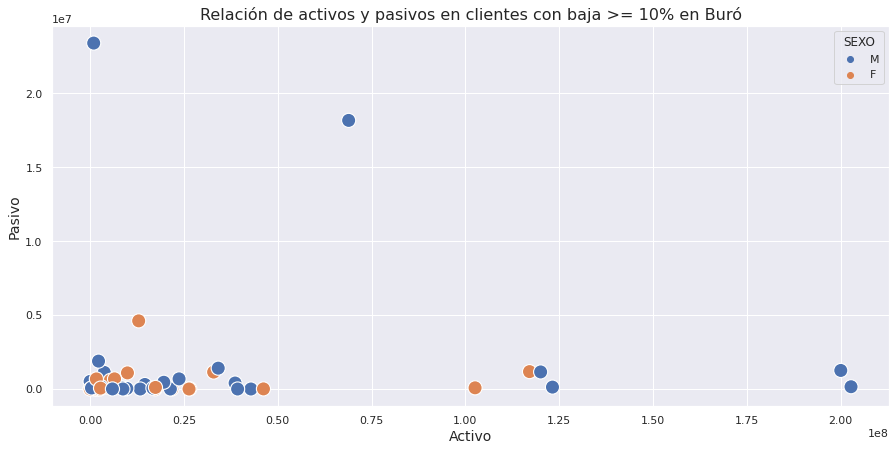

In [299]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(data=df[df["BAJO_BURO"]=="Baja"], x="ACTIVO", y="PASIVO", hue="SEXO", s=200)
ax.set_title('Relación de activos y pasivos en clientes con baja >= 10% en Buró', fontsize=16)
ax.set_xlabel('Activo', fontsize=14)
ax.set_ylabel('Pasivo', fontsize=14)

In [231]:
sns.pairplot(df, 
             vars = ['ACTIVO', 
                     'PASIVO', 
                     'VOLUMEN DE NEGOCIO', 
                     'INGRESO_FINAL',  
                     'MAR_INVERSIÓN_ACUM',
                     'RENTABILIDAD CLIENTE'], 
             hue = 'BAJO_BURO', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 20);
# Title 
plt.suptitle('Pair Plot de caracterización de clientes con bajo en Buró de Feb/21 respecto a Dic/20', 
             size = 28);

